In [ ]:
from common import constants
from utils import load_images
from image.operations import Operations

import numpy as np
from matplotlib import pyplot as plt

r_count = 5
source_loc = constants.PROCESSED_DATASET_MAPPINGS['train']
images = load_images(source_loc, r_count)

filters = np.asarray([
    [
        [1, 0, -1],
        [2, 0, -2], 
        [1, 0, -1]
    ],
    [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]
])

n_images = len(images)
n_filters = len(filters)
height = 5*n_images
width = 12*n_filters
figsize = (height, width)


figure, axes = plt.subplots(figsize = (5, 4))
axes.imshow(img, cmap = plt.get_cmap('gray'))
figure.tight_layout()

fltr_figure, fltr_axes = plt.subplots(n_images, n_filters, figsize = figsize)

for col_id, fltr in enumerate(filters):
    for row_id, conv_image in enumerate(Operations.convolve(images, fltr)):
        fltr_axes[row_id, col_id].imshow(conv_image, cmap = plt.get_cmap('gray'))

fltr_figure.tight_layout()

In [ ]:
from common import constants
from utils import load_images
from image.operations import Operations

import numpy as np
import cv2
from matplotlib import pyplot as plt

r_count = 5
source_loc = constants.PROCESSED_DATASET_MAPPINGS['train']
images = load_images(source_loc, r_count)

grid_rows = len(images)
n_filters = 3
grid_cols = n_filters + 1
figsize = (grid_rows*5, grid_cols*4)

figure, axes = plt.subplots(grid_rows, grid_cols, figsize = figsize)

for idx, image in enumerate(images):   
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    
    abs_sobel64f = np.absolute(laplacian)
    sobel_8u = np.uint8(abs_sobel64f)
    
    axes[idx, 0].imshow(image ,cmap = 'gray')
    axes[idx, 1].imshow(sobel_8u ,cmap = 'gray')
    axes[idx, 2].imshow(sobely ,cmap = 'gray')
    axes[idx, 3].imshow(laplacian ,cmap = 'gray')



In [1]:
def get_layer_id(model, layer_name):
    for l_idx, layer in enumerate(model.layers):
        if layer.name == layer_name:
            return l_idx
    
    return None

In [7]:
#Get current working directory
from os import getcwd

#Unittests
import unittest as ut

#Local imports
from model_utils import load_pretrained_model
from visualization import HistoryInsights
from visualization import ModelInsights
from visualization import WeightInsights
from visualization import PlottingUtils
from common import ut_constants

#Keras
from keras import backend as K

model_name = "cnn_model2d_1"
store = ut_constants.UT_DATA_STORE

model, _ = load_pretrained_model(model_name, store)
model_insights = ModelInsights(model)

#Disable training
K.set_learning_phase(0)


In [8]:
from common import constants
from utils import load_images

import numpy as np

r_count = 5
source_loc = constants.PROCESSED_DATASET_MAPPINGS['train']
images = load_images(source_loc, r_count)
images = np.asarray(images)
images = np.expand_dims(images, axis = -1)

print(images.shape)



(5, 400, 700, 1)


In [9]:
inputs = [model.layers[0].input]
outputs = [model.get_layer('conv2d_1').output]

get_activations = K.function(inputs, outputs)
activations = get_activations([images])

7 5 32
7 5 32
7 5 32
7 5 32
7 5 32


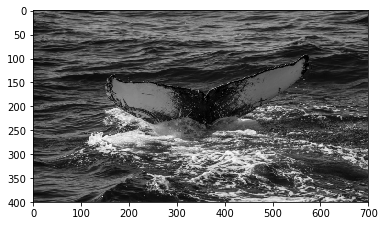

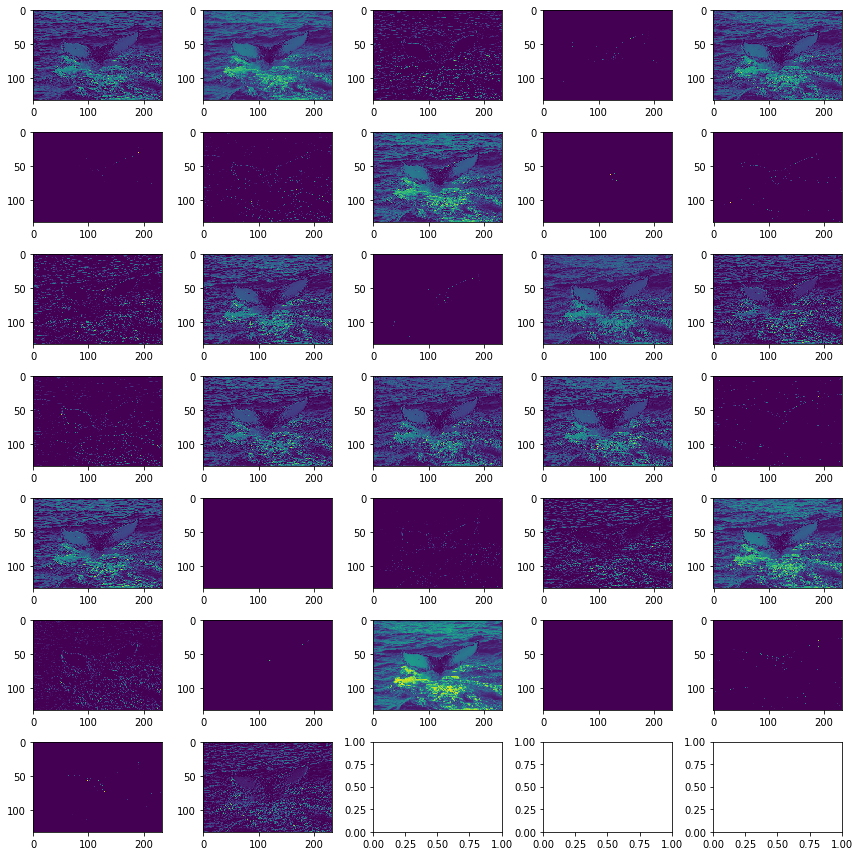

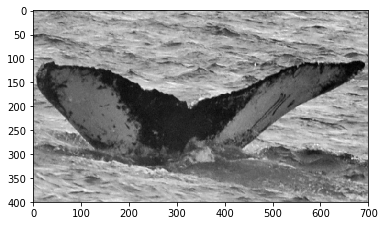

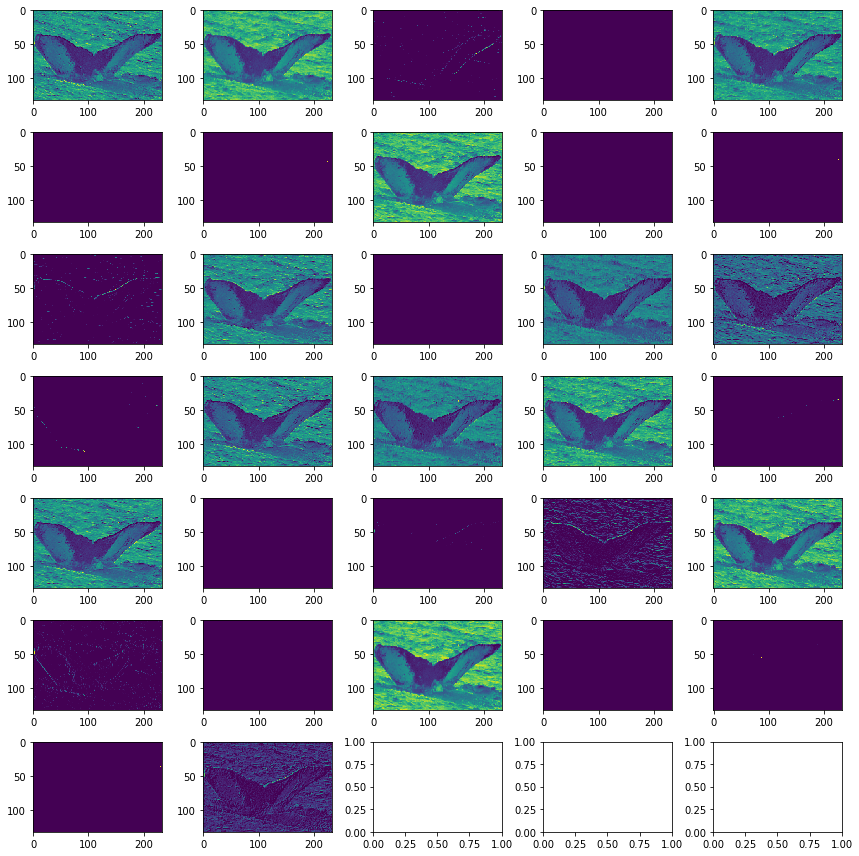

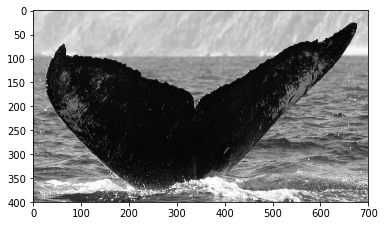

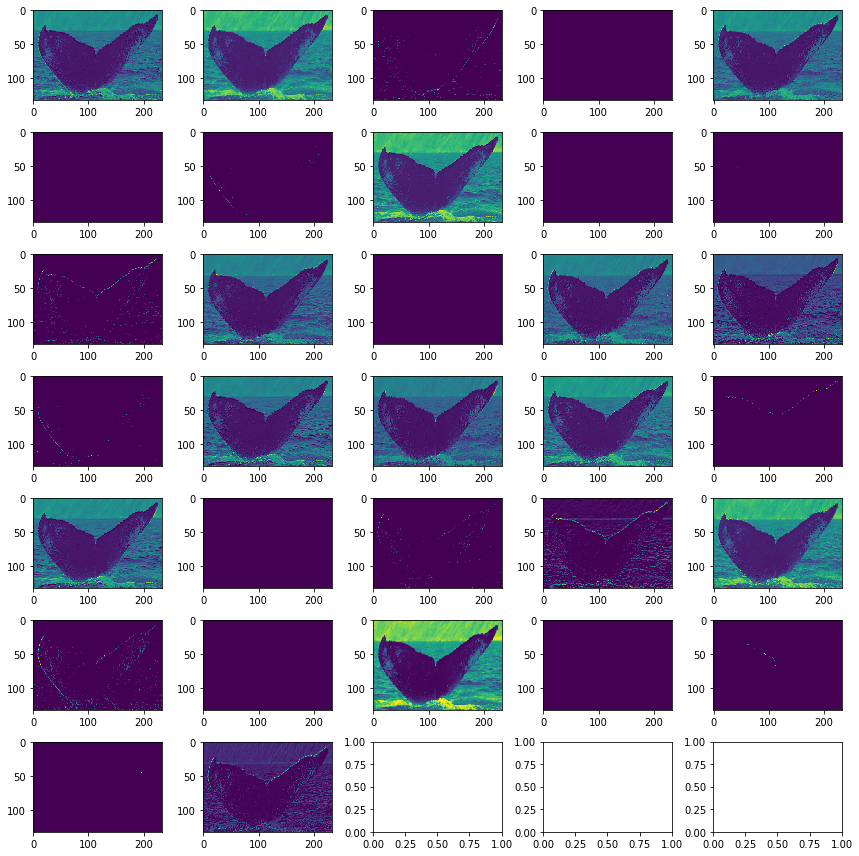

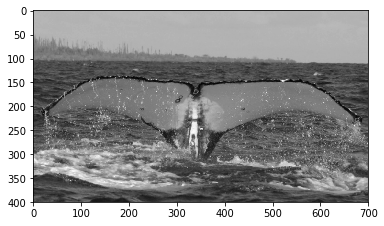

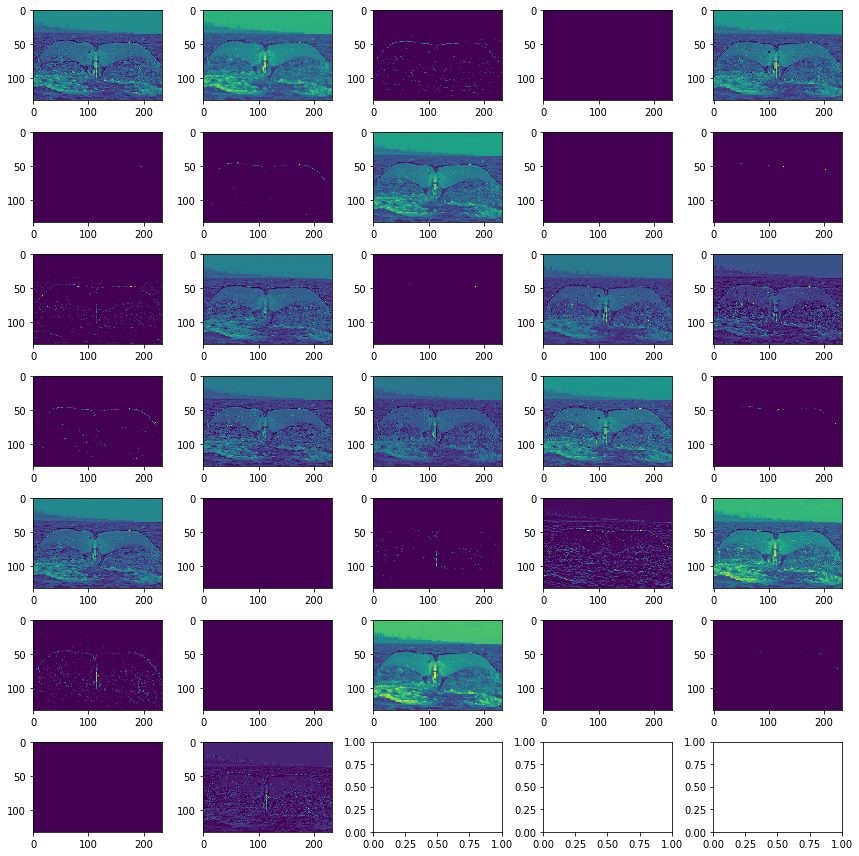

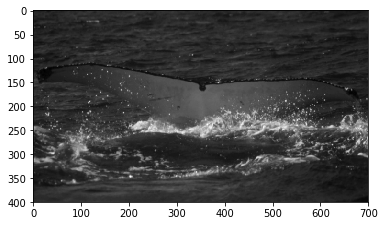

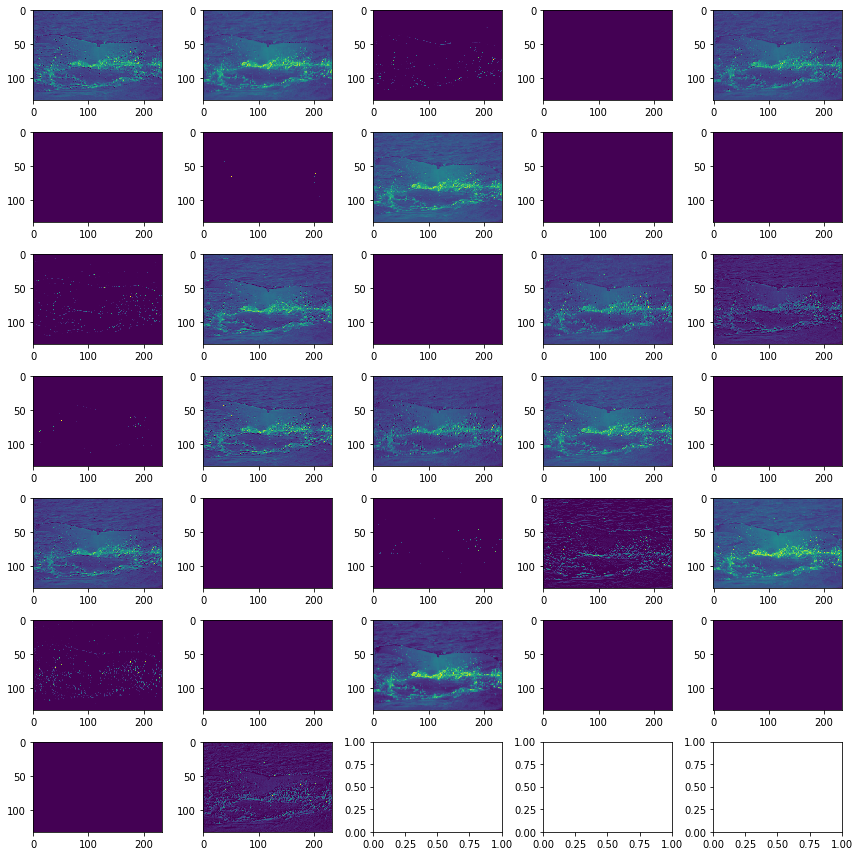

In [11]:
from matplotlib import pyplot as plt
from visualization import PlottingUtils as putils
from math import sqrt

for image_id in range(r_count):
    plt.figure()
    image_act = activations[0][image_id, :, :, :]
    n_filters = image_act.shape[-1]

    cols = int(sqrt(n_filters))
    rows = int((n_filters + cols - 1)/cols)

    image = images[image_id, :, :, :]
    image = np.reshape(image, (image.shape[0], image.shape[1]))
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    figure, axes = plt.subplots(rows, cols, figsize = (12, 12))

    print(rows, cols, n_filters)

    for fid in range(n_filters):
        location = putils.get_plot_axes((rows, cols), fid)
        image = np.asarray(image_act[:, :, fid])
        axes[location].imshow(image, aspect='auto')

    figure.tight_layout()
    figure.savefig("image_{}.png".format(image_id), dpi=100)

In [51]:
from common import constants
from utils import load_images
from image.operations import Operations

import numpy as np
import cv2
from matplotlib import pyplot as plt

#Keras visualizations
from keract import get_activations

#Unittests
import unittest as ut

#Local imports
from model_utils import load_pretrained_model
from common import ut_constants
from visualization import ModelInsights

r_count = 100
source_loc = constants.PROCESSED_DATASET_MAPPINGS['train']
images = load_images(source_loc, r_count)

model_name = "cnn_model2d_1"
store = ut_constants.UT_DATA_STORE
model, _ = load_pretrained_model(model_name, store)

insights = ModelInsights(model)

model.summary()






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 133, 233, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 77, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 38, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 38, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 12, 64)         18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 2, 64)          0         
__________

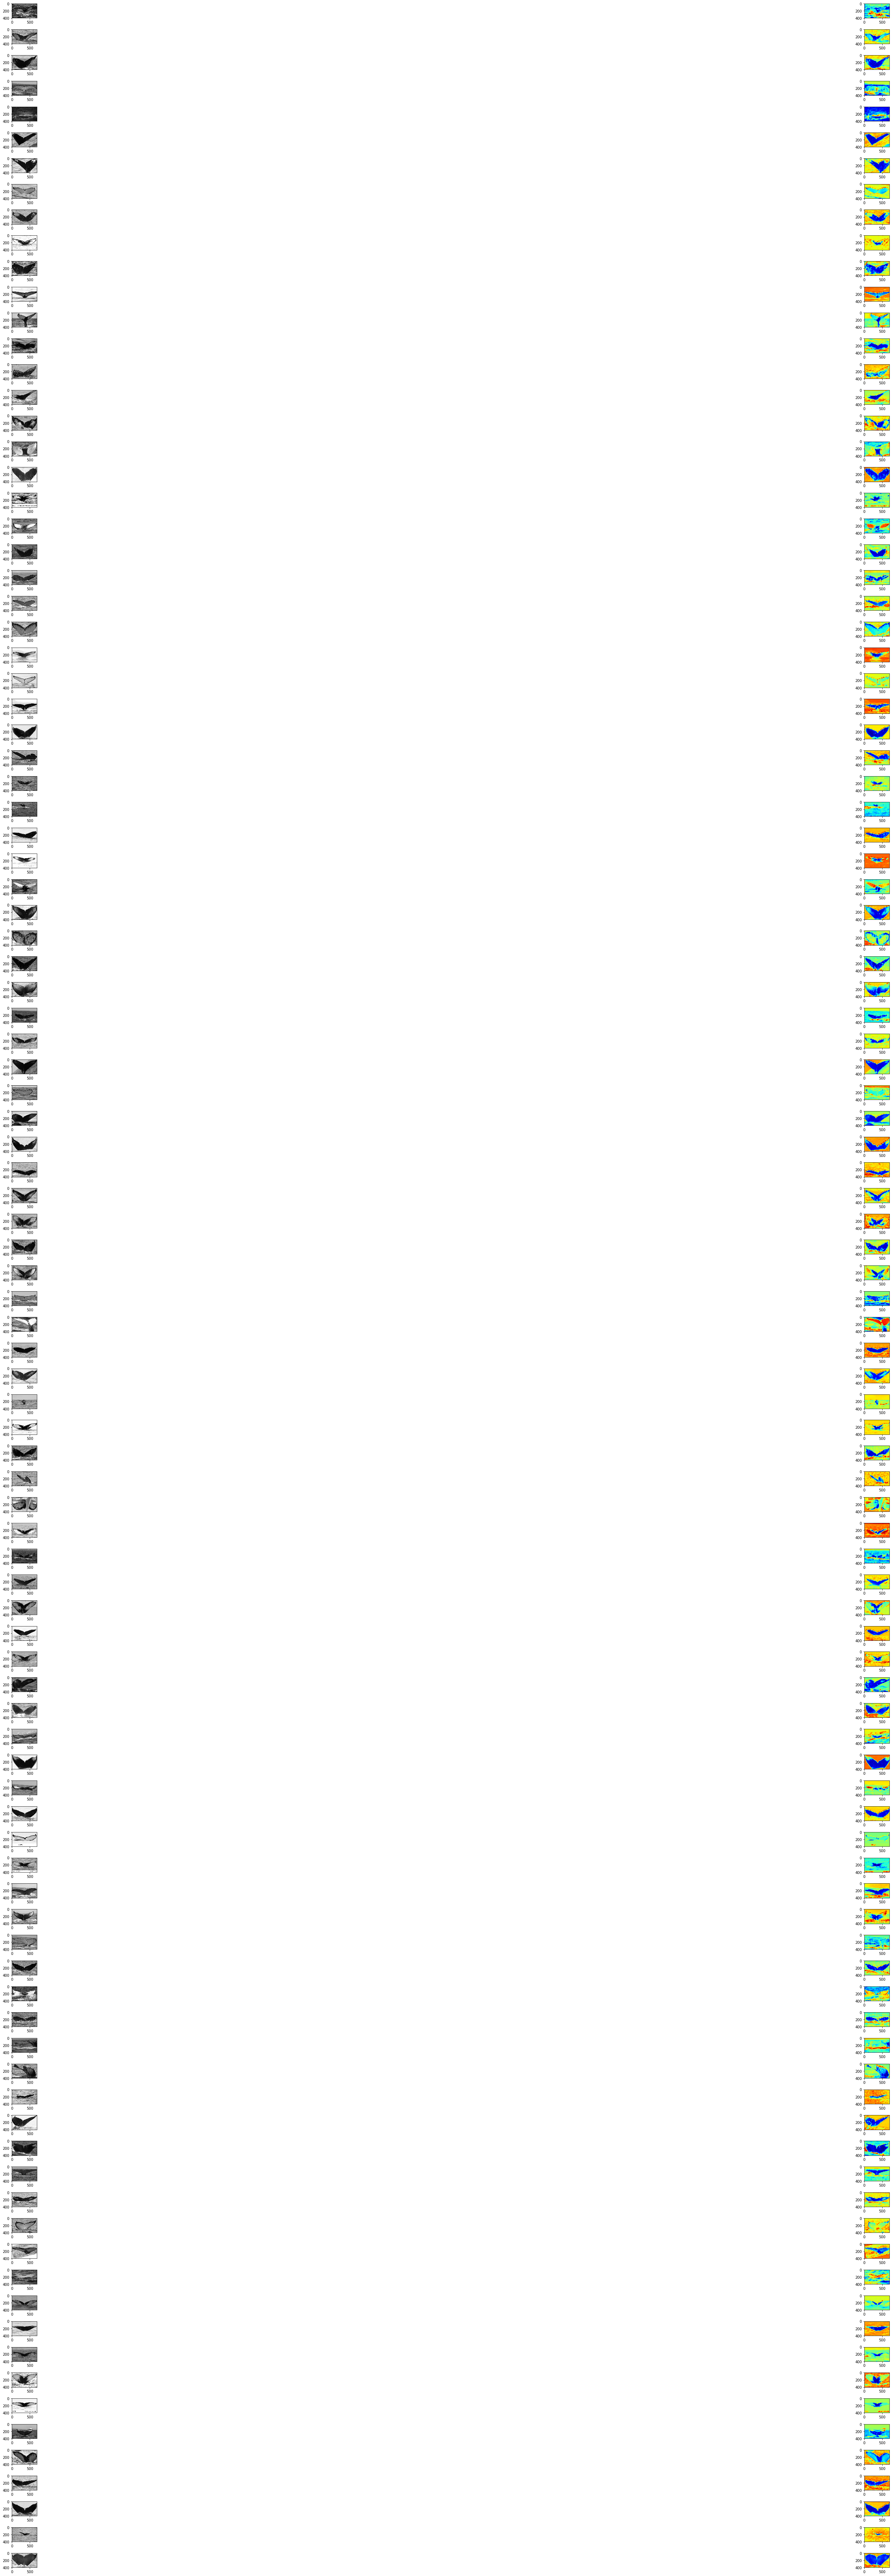

In [53]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
from vis.visualization.saliency import visualize_cam

from matplotlib import pyplot as plt
from matplotlib import cm

from PIL import Image

import numpy as np

def get_layer_id(model, layer_name):
    for l_idx, layer in enumerate(model.layers):
        if layer.name == layer_name:
            return l_idx
    
    return None

l_idx = get_layer_id(model, 'conv2d_3')
figure, axes = plt.subplots(len(images), 2, figsize = (len(images), len(images)))

def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

for row, image in enumerate(images):
    img = np.expand_dims(image, axis = -1)

    # Utility to search for layer index by name. 
    # Alternatively we can specify this as -1 since it corresponds to the last layer.
    new_img = visualize_cam(model, l_idx, None, img)

    
    axes[row, 0].imshow(image, cmap = plt.get_cmap('gray'))
    axes[row, 1].imshow(new_img, cmap = plt.get_cmap('gray'))

figure.tight_layout()



In [ ]:
#Scratch
#img = imread(locate_train_img("0000e88ab.jpg"))

In [ ]:
print(X_TRAIN.shape)